In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.io import fits

In [2]:
data_= fits.open('catalogs/matched.fits')
data_[1].data

FITS_rec([( 299489676975171584, 146.71420288, -1.04130435, 0.02127545, 10.29470062, -5.20650327e-01, -9999., 0, 1,  299489676975171584, 4.6211758e+02, 10.688581 , 98.78678  , 6.727546 , 72.29009   , 6.938117 , 205.90462 , 8.761121 ,  299489676975171584, 146.71421, -1.0413043 , 0.02127545, 10.18000031, 0.,  4.  , 'composite'),
          ( 299489951853078528, 146.91944885, -0.99049175, 0.21392463, 11.16201782, -3.49721670e-01, -9999., 0, 1,  299489951853078528, 1.5469431e+01,  6.547065 ,  8.996722 , 3.6223369,  0.20092708, 2.917477 ,  23.569141, 6.1320004,  299489951853078528, 146.91945, -0.99049175, 0.21392463, 11.09000015, 0.,  3.  , 'composite'),
          ( 299490501608892416, 146.85983276, -0.80890167, 0.12655362, 11.37362385, -1.12491751e+00, -9999., 0, 1,  299490501608892416, 1.8467436e+01,  7.4497437,  6.5413513, 5.414522 , 19.528574  , 4.65369  ,  11.638905, 4.7927322,  299490501608892416, 146.85983, -0.80890165, 0.12655362, 11.14000034, 0., 12.  , 'composite'),
          ...,
 

In [3]:
SFR = data_[1].data['Log_SFR_Msun_yr']
mass = data_[1].data['Log_stellar_mass_Msun_1']
Z_neb = data_[1].data['Metallicity_nebular']

In [4]:
Z_neb_1 = Z_neb[Z_neb > -99]
mass_1 = mass[mass > -99]
SFR_1 = SFR[SFR > -99]
print(Z_neb)
print(mass_1)
print(SFR_1)

[-9999. -9999. -9999. ... -9999. -9999. -9999.]
[10.29470062 11.16201782 11.37362385 ... 10.94297028 10.75484371
 10.98335648]
[-0.52065033 -0.34972167 -1.12491751 ...  0.19182718 -2.05821419
 -0.83074206]


In [5]:
mask = np.logical_and(SFR>-99, mass>-99)
mass_SFR = np.vstack([mass[mask], SFR[mask]])

print(mass_SFR)
print(mass_SFR.shape)

[[10.29470062 11.16201782 11.37362385 ... 10.23716545  9.20087433
   9.95433998]
 [-0.52065033 -0.34972167 -1.12491751 ...  0.19182718 -2.05821419
  -0.83074206]]
(2, 786907)


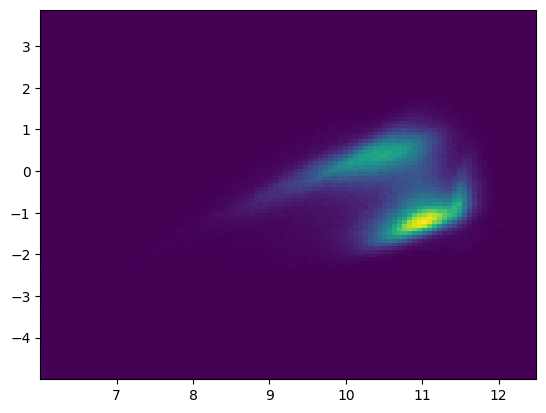

In [6]:
plt.hist2d(mass_SFR[0, :], mass_SFR[1, :], bins = 100, cmap = 'viridis');

In [7]:
eps = .25
r = (10**(mass_SFR[1, :])/10**(mass_SFR[0, :]))*10**(-9)
t = 1/eps *np.log(1 + eps/r)

print(t)

[176.96094939 183.3749249  192.46370594 ... 169.86887055 181.04792342
 176.68216245]


Text(0.5, 1.0, 'Age of the galaxies')

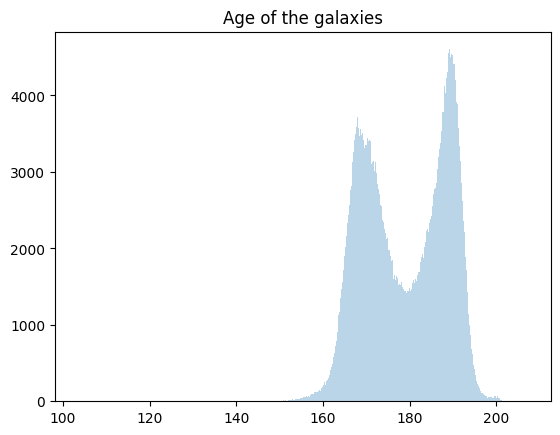

In [8]:
#plt.figure(figsize = (12,3))
plt.hist(t, bins = 1000, alpha = .3)
#plt.xlim(500,1200)
plt.title('Age of the galaxies')

The distribution is non uniform, so the Closed Box doesn't work.

So, the problem is, what is the value of t? To understand, we need the kennycutt-schmidt relations